<a href="https://colab.research.google.com/github/das2002/Remote-Sensing-Beaverworks/blob/master/06_Intro_to_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing
This lesson will go over how to work with image data, extract information, and perform basic operations and transformations on images.

We'll be using primarily the [Pillow](https://pillow.readthedocs.io/en/stable/index.html) and [opencv](https://opencv.org/) libraries.

Pillow is a fork of the older, no-longer maintained PIL (python imaging library) package. It provides base classes for representing image data, and some convenience helper functions and dictionaries.

OpenCV is a powerful image processing library. It is originally a C++ library, but we will be using the python bindings to call it in python. One important quirk of OpenCV is that **it represents image channels in BGR**, i.e. the first channel is Blue, whereas most other image representations (including PIL) use RGB, where the first channel is Red. Thus, you must make sure to switch up the order of channels when converting between PIL and opencv. 
(_The reason that opencv uses BGR is that old windows systems used to represent images in BGR, and when opencv was created, they followed that convention_)

In [0]:
# fortunately colab has both Pillow and opencv installed by default
import PIL # Python Image Library (pillow)
import pandas as pd
from PIL.ExifTags import TAGS, GPSTAGS # dictionaries for exiftags and gpstags names
import cv2 as cv # opencv package
try:
  import piexif
  import piexif.helper
except:
  !pip install piexif
  import piexif
  import piexif.helper

from google.colab.patches import cv2_imshow # colab-specific code to render cv2 images
from google.colab import drive
import pathlib # standard library package for working with file paths
import numpy as np
from matplotlib import pyplot as plt

## Import images


In [9]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# see what's in the folder
ls drive/'My Drive'/'BWSI-Remote-Sensing'

20190717_142059.jpg  IMG_0748.jpg
20190717_142111.jpg  IMG_0749.jpg
20190717_142113.jpg  IMG_0750.jpg
20190717_142143.jpg  IMG_0751.jpg
20190717_142156.jpg  IMG_0752.jpg
20190717_142158.jpg  IMG_0753.jpg
20190717_142211.jpg  IMG_0754.jpg
20190717_142212.jpg  IMG_0755.jpg
20190717_142214.jpg  IMG_0756.jpg
20190717_142216.jpg  IMG_0757.jpg
20190717_142242.jpg  IMG_0758.jpg
20190717_142248.jpg  IMG_0759.jpg
20190717_142251.jpg  IMG_0760.jpg
20190717_142301.jpg  IMG_0761.jpg
20190717_142306.jpg  IMG_0762.HEIC
20190717_142312.jpg  IMG_0762.jpg
20190717_142314.jpg  IMG_0763.jpg
20190717_142316.jpg  IMG_0764.jpg
20190717_142318.jpg  IMG_0765.jpg
20190717_142319.jpg  IMG_20190717_140412490.jpg
20190717_142321.jpg  IMG_20190717_140528657_HDR.jpg
20190717_142328.jpg  IMG_20190717_140533275_HDR.jpg
20190717_142349.jpg  IMG_20190717_140538117_HDR.jpg
20190717_142401.jpg  IMG_20190717_140553550_HDR.jpg
20190717_142402.jpg  IMG_20190717_140554588_HDR.jpg
20190717_142406.jpg  IMG_20190717_140606.jpg


In [0]:
# create a pathlib Path object
# pathlib provides functions that make it easier to operate with file paths
image_folder = pathlib.Path('/content/drive/My Drive/BWSI-Remote-Sensing')

In [18]:
image_folder.iterdir()

<generator object Path.iterdir at 0x7ff339d56af0>

In [12]:
# iterdir gives an iterator for all of the items within a pathlib Path directory
# get list of files that are jpg or png
compatible_imgs = [x for x in image_folder.iterdir() 
                   if ((x.suffix.lower() == '.jpg') 
                       or (x.suffix.lower() == '.png'))]

compatible_imgs

[PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142111.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142328.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142525.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142314.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142842.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142318.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142316.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142401.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142319.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142402.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142752.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sensing/20190717_142737.jpg'),
 PosixPath('/content/drive/My Drive/BWSI-Remote-Sens

/content/drive/My Drive/BWSI-Remote-Sensing/IMG_20190717_140934305_HDR.jpg


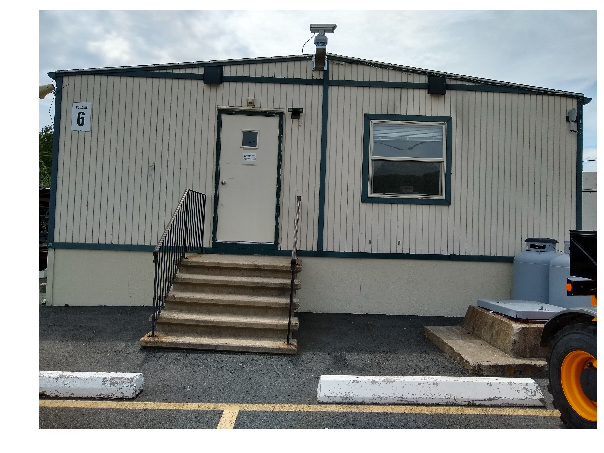

In [25]:
random_image_path = np.random.choice(compatible_imgs)
random_img = PIL.Image.open(random_image_path)
print(random_image_path)
fig= plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,1,1)
ax.imshow(random_img)
ax.set_axis_off()

In [26]:
random_img_exif = random_img._getexif()
random_img_exif

{271: 'motorola',
 272: 'moto g(6)',
 282: (72, 1),
 283: (72, 1),
 296: 2,
 305: 'ali-user 8.0.0 OPSS27.82-87-8 10 release-keys',
 306: '2019:07:17 14:09:36',
 531: 1,
 33434: (1, 2255),
 33437: (18, 10),
 34665: 236,
 34850: 2,
 34853: {0: b'\x02\x02\x00\x00', 18: 'WGS-84'},
 34855: 100,
 36864: b'0220',
 36867: '2019:07:17 14:09:36',
 36868: '2019:07:17 14:09:36',
 37121: b'\x01\x02\x03\x00',
 37377: (11139, 1000),
 37378: (169599, 100000),
 37379: (0, 100),
 37380: (0, 6),
 37381: (169599, 100000),
 37383: 2,
 37385: 16,
 37386: (3950, 1000),
 37500: b'MOT\x00\x01\x01\x01\x01\x00FU\x00\x00\x02\x00\x00\x00\x0f\x00\x00\x03VU\x12\x00\x04\x00\x00\x00\x01\x00\x00\x00\x00U\x02\x00\x01\x00\x00\x00\x01F\x00\x00\x00U\x03\x00\x01\x00\x00\x00\x01&\x00\x00\x00U0\x00\x02\x00\x00\x00\x13\x00\x00\x03eU@\x00\x01\x00\x00\x00\x01_\x00\x00\x00UP\x00\x01\x00\x00\x00\x01_\x00\x00\x00U`\x00\x02\x00\x00\x00\x05\x00\x00\x03xf\xff\x00\x03\x00\x00\x00\x01\x00\x00\x00\x00g\x00\x00\x02\x00\x00\x00\x11\x00\x00

## Parsing EXIF
The dictionary has numeric codes for keys. For human readability, it's convenient to use the text descriptions as the keys.

There are a few lookup dictionaries that can be used to find the text descriptions. We've imported them as TAGS and GPSTAGS

In [27]:
TAGS

{11: 'ProcessingSoftware',
 254: 'NewSubfileType',
 255: 'SubfileType',
 256: 'ImageWidth',
 257: 'ImageLength',
 258: 'BitsPerSample',
 259: 'Compression',
 262: 'PhotometricInterpretation',
 263: 'Thresholding',
 264: 'CellWidth',
 265: 'CellLength',
 266: 'FillOrder',
 269: 'DocumentName',
 270: 'ImageDescription',
 271: 'Make',
 272: 'Model',
 273: 'StripOffsets',
 274: 'Orientation',
 277: 'SamplesPerPixel',
 278: 'RowsPerStrip',
 279: 'StripByteCounts',
 280: 'MinSampleValue',
 281: 'MaxSampleValue',
 282: 'XResolution',
 283: 'YResolution',
 284: 'PlanarConfiguration',
 285: 'PageName',
 288: 'FreeOffsets',
 289: 'FreeByteCounts',
 290: 'GrayResponseUnit',
 291: 'GrayResponseCurve',
 292: 'T4Options',
 293: 'T6Options',
 296: 'ResolutionUnit',
 297: 'PageNumber',
 301: 'TransferFunction',
 305: 'Software',
 306: 'DateTime',
 315: 'Artist',
 316: 'HostComputer',
 317: 'Predictor',
 318: 'WhitePoint',
 319: 'PrimaryChromaticities',
 320: 'ColorMap',
 321: 'HalftoneHints',
 322: 'T

In [22]:
GPSTAGS

{0: 'GPSVersionID',
 1: 'GPSLatitudeRef',
 2: 'GPSLatitude',
 3: 'GPSLongitudeRef',
 4: 'GPSLongitude',
 5: 'GPSAltitudeRef',
 6: 'GPSAltitude',
 7: 'GPSTimeStamp',
 8: 'GPSSatellites',
 9: 'GPSStatus',
 10: 'GPSMeasureMode',
 11: 'GPSDOP',
 12: 'GPSSpeedRef',
 13: 'GPSSpeed',
 14: 'GPSTrackRef',
 15: 'GPSTrack',
 16: 'GPSImgDirectionRef',
 17: 'GPSImgDirection',
 18: 'GPSMapDatum',
 19: 'GPSDestLatitudeRef',
 20: 'GPSDestLatitude',
 21: 'GPSDestLongitudeRef',
 22: 'GPSDestLongitude',
 23: 'GPSDestBearingRef',
 24: 'GPSDestBearing',
 25: 'GPSDestDistanceRef',
 26: 'GPSDestDistance',
 27: 'GPSProcessingMethod',
 28: 'GPSAreaInformation',
 29: 'GPSDateStamp',
 30: 'GPSDifferential',
 31: 'GPSHPositioningError'}

In [0]:
# here's some functions to parse the exif data and convert them to decimal format
def parse_exif(exif_dict):
  human_readable = {}
  for k, v in exif_dict.items():
    text_key = TAGS[k]
    if type(v) == tuple and len(v)==2:
      v = divide_tuple(v)
    if k == 34853: # GPS info field
      human_readable[text_key] = parse_gps(v)
    elif not ((text_key == 'UserComment') or (text_key == 'MakerNote')):
      human_readable[text_key] = v
  return human_readable
      
def parse_gps(gps_dict):
  readable_gps = {}
  for k,v in gps_dict.items():
    text_key = GPSTAGS[k]
    if text_key in ['GPSLatitude', 'GPSLongitude']:
      v = convert_GPS_coord(v)
    if type(v)==tuple and len(v)==2:
      v=divide_tuple(v)
    if type(v) == bytes:
      v = v.hex()
    readable_gps[text_key] = v
  return readable_gps

def divide_tuple(tup):
    try:
        quot = tup[0]/tup[1]
        return quot
    except:
        return None

def convert_GPS_coord(GPS_tuple):
    """ Converts the GPS coordinate given by exif into decimal coord
    GPS_Tuple = (
       (degreesNumerator, degreesDenominator), 
       (minutesNumerator, minutesDenominator), 
       (secondsNumerator, secondsDenominator)
       )
    """
    try:
        hr_tuple = GPS_tuple[0]
        degs = hr_tuple[0]/hr_tuple[1]
        min_tuple = GPS_tuple[1]
        mins = min_tuple[0]/min_tuple[1] 
        sec_tuple = GPS_tuple[2]
        secs = sec_tuple[0]/sec_tuple[1] 
        return degs + mins/60 + secs/3600
    except:
        return None



In [34]:
parsed = parse_exif(random_img_exif) 
type(parsed)

dict

In [33]:
for img_path in compatible_imgs:
  img = PIL.Image.open(img_path)
  exif = parse_exif(img._getexif())
  if 'GPSInfo' in exif.keys():
    print(exif['GPSInfo'])
  

{'GPSVersionID': '02020000', 'GPSLatitudeRef': 'N', 'GPSLatitude': 0.0, 'GPSLongitudeRef': 'E', 'GPSLongitude': 0.0, 'GPSAltitudeRef': '00', 'GPSAltitude': 0.0, 'GPSTimeStamp': ((18, 1), (21, 1), (10, 1)), 'GPSDateStamp': '2019:07:17'}
{'GPSVersionID': '02020000', 'GPSLatitudeRef': 'N', 'GPSLatitude': 0.0, 'GPSLongitudeRef': 'E', 'GPSLongitude': 0.0, 'GPSAltitudeRef': '00', 'GPSAltitude': 0.0, 'GPSTimeStamp': ((18, 1), (23, 1), (26, 1)), 'GPSDateStamp': '2019:07:17'}
{'GPSVersionID': '02020000', 'GPSLatitudeRef': 'N', 'GPSLatitude': 0.0, 'GPSLongitudeRef': 'E', 'GPSLongitude': 0.0, 'GPSAltitudeRef': '00', 'GPSAltitude': 0.0, 'GPSTimeStamp': ((18, 1), (25, 1), (24, 1)), 'GPSDateStamp': '2019:07:17'}
{'GPSVersionID': '02020000', 'GPSLatitudeRef': 'N', 'GPSLatitude': 0.0, 'GPSLongitudeRef': 'E', 'GPSLongitude': 0.0, 'GPSAltitudeRef': '00', 'GPSAltitude': 0.0, 'GPSTimeStamp': ((18, 1), (23, 1), (13, 1)), 'GPSDateStamp': '2019:07:17'}
{'GPSVersionID': '02020000', 'GPSLatitudeRef': 'N', 'GPS

### Exercise
Create a dataframe that holds the metadata of the images in the google drive. You do not need to store all of the metadata fields, just the ones that you may be interested in.

Note that not all images will have all of the EXIF fields filled out, so you will have entries with blank values in certain columns.

Note also that the `GPSInfo` element of EXIF is a dictionary in and of itself. Be cognizant of this when trying to access those attributes. For example, you cannot get `exif_info['GPSLatitude']` directly. You have to get it as `exif_info['GPSInfo']['GPSLatitude']`

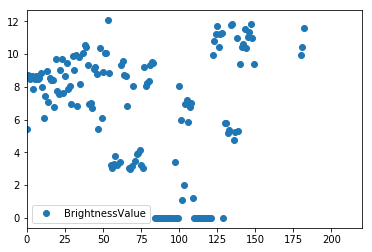

In [59]:
random_image_path = np.random.choice(compatible_imgs)
random_img = PIL.Image.open(random_image_path)
#print(random_image_path)
#fig= plt.figure(figsize=[10,10])

#ax = fig.add_subplot(1,1,1)
#ax.imshow(random_img)
#ax.set_axis_off()
list_of_exif = []
for img_path in compatible_imgs:
  img = PIL.Image.open(img_path)
  exif = parse_exif(img._getexif())
  gps_info = {}
  if 'GPSInfo' in exif.keys():
    gps_info= exif.pop("GPSInfo")
    #exif.delete("GPSInfo")
    for key in gps_info:
      exif.update( {key : gps_info[key]} )
  list_of_exif.append(exif)  
  

#print(exif)

#print(gps_info)
#random_img_exif = random_img._getexif()
#random_img_exif
#for img_path in compatible_imgs:
 # img = PIL.Image.open(img_path)
  #exif = parse_exif(img._getexif())
  #if 'GPSInfo' in exif.keys():
   # print(exif['GPSInfo'])
#   print(type())
df = pd.DataFrame(list_of_exif)
df.sort_values(by=['DateTime'])
new = df[['DateTime', 'BrightnessValue']].copy()
new.plot(marker = 'o', linestyle = " ")

## Image processing


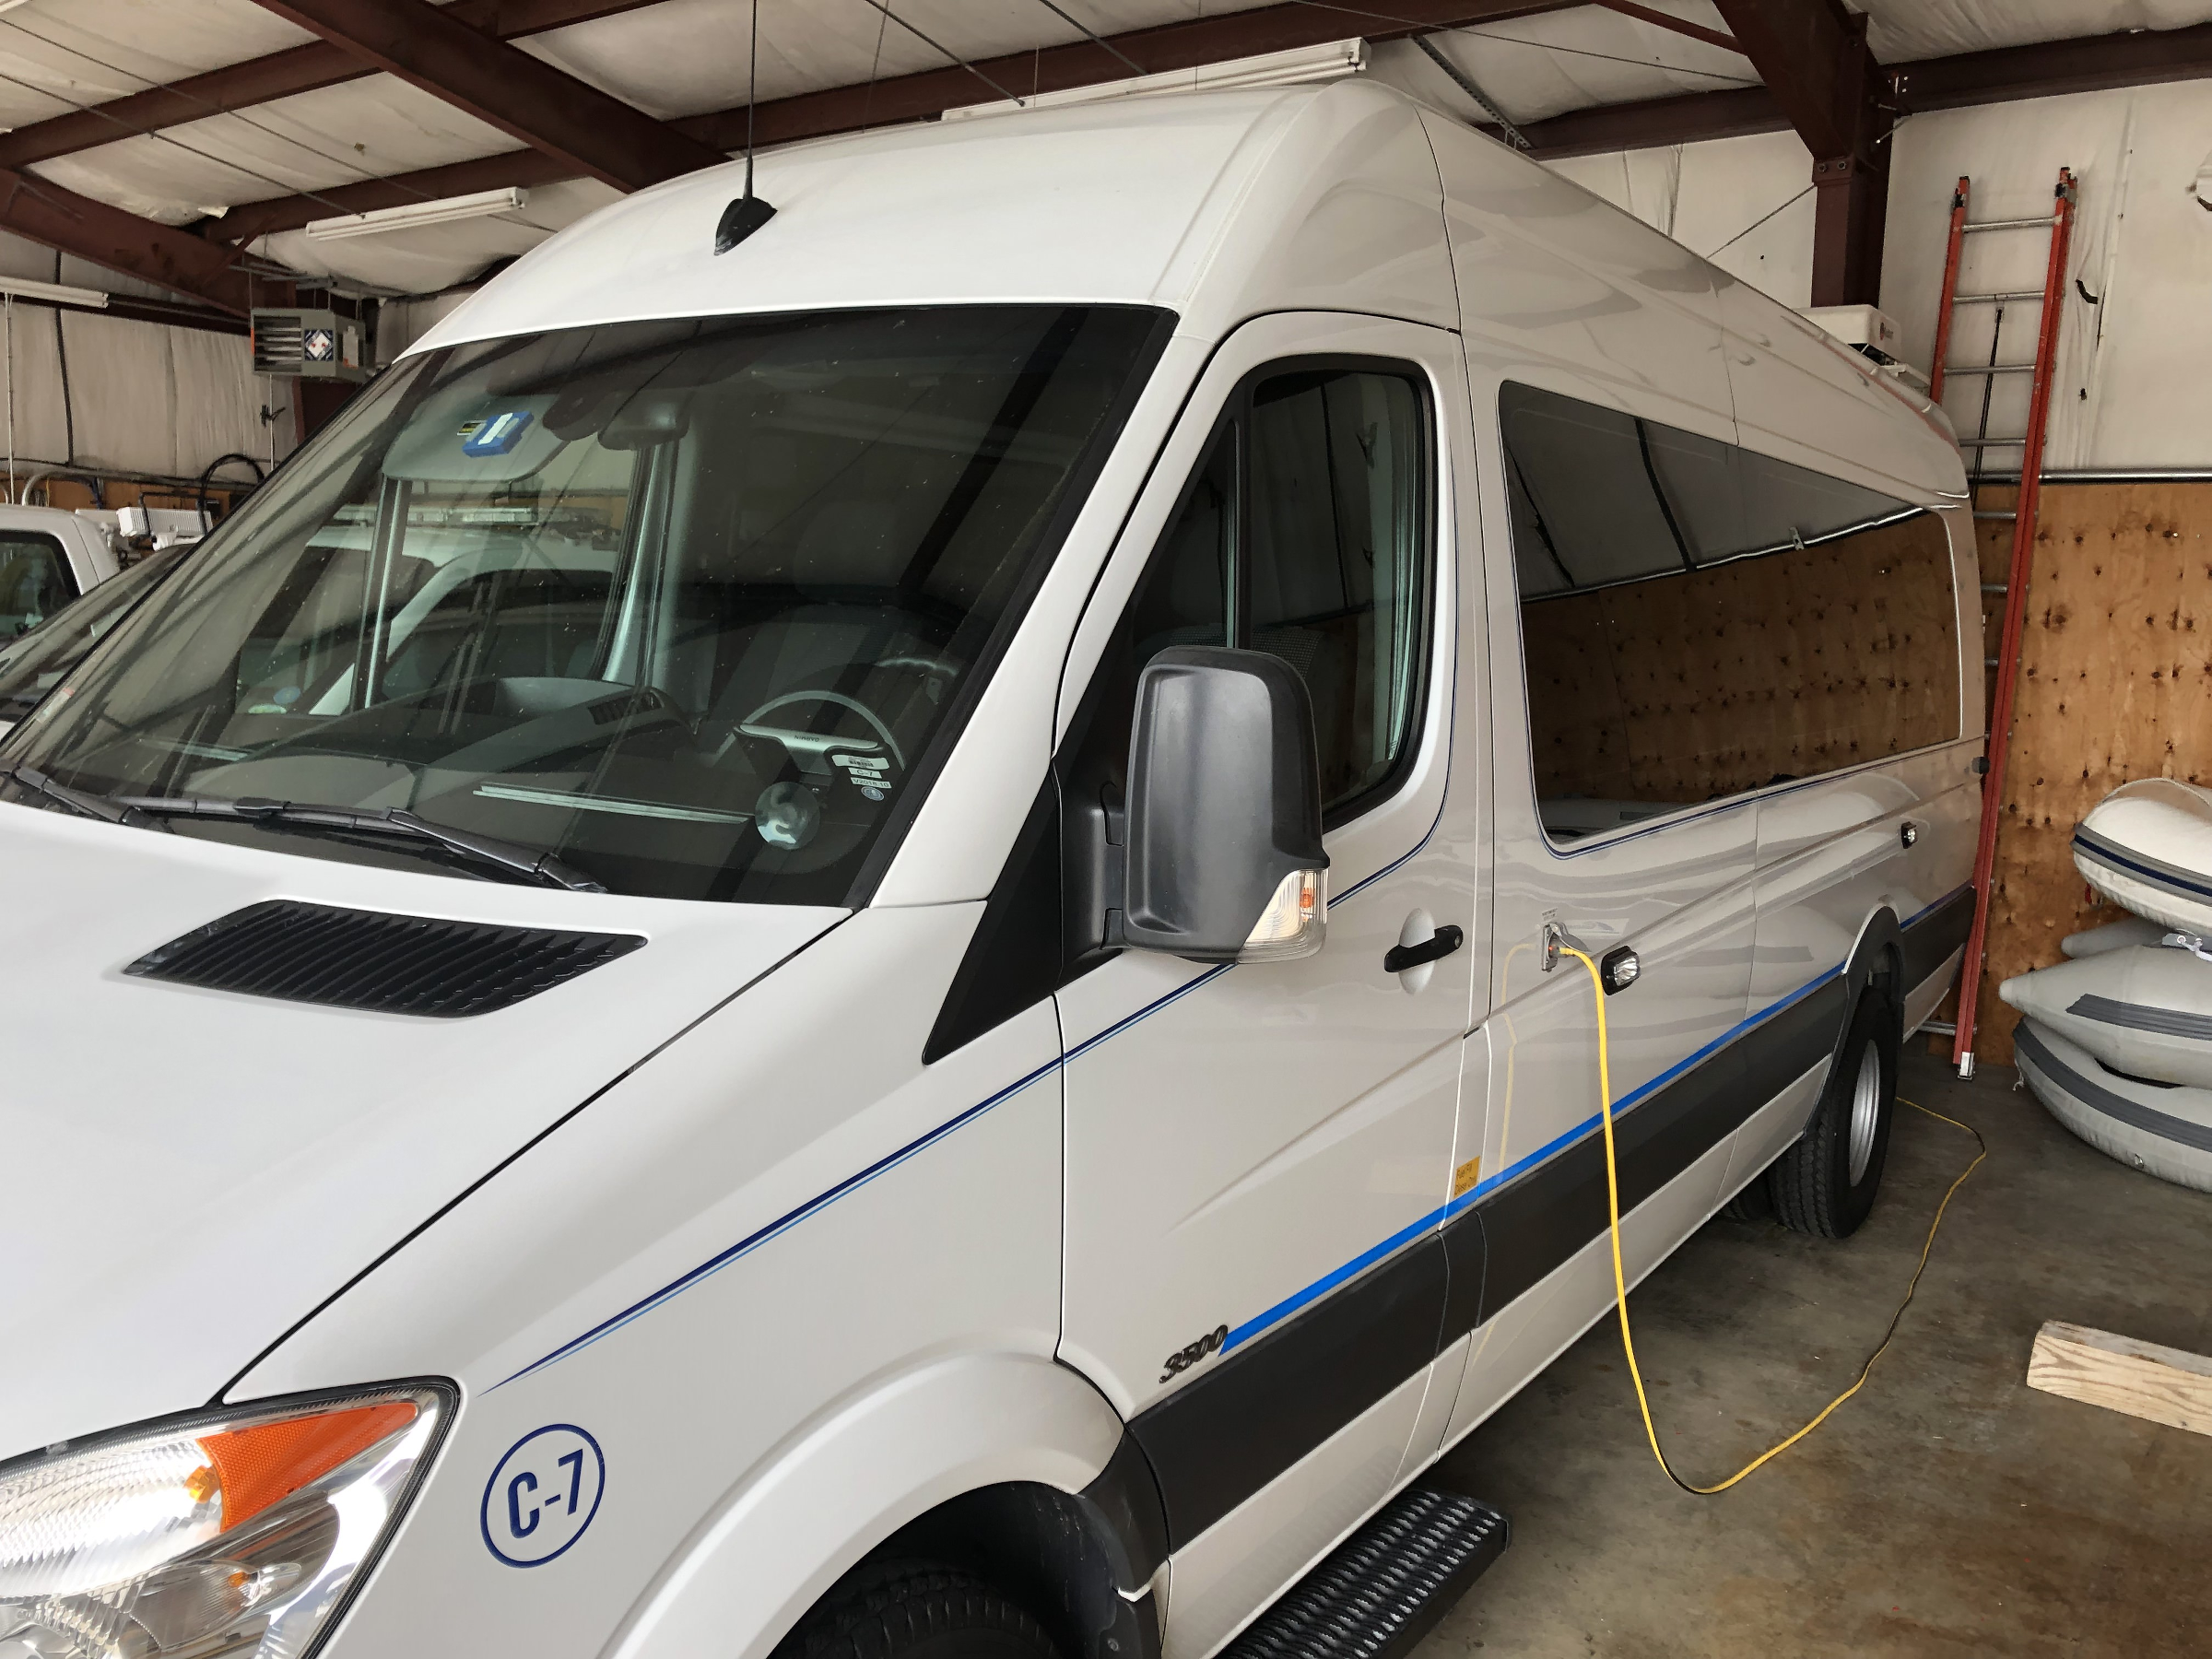

In [61]:
# Get raw image
raw_img = cv.imread(str(random_image_path),-1)
# Convert to lower resolution for analysis speedup
lowres_dim = 1800
img_shape = raw_img.shape
img = cv.resize(raw_img,
                (int((img_shape[1]/img_shape[0])*lowres_dim), lowres_dim ),
                interpolation=cv.INTER_CUBIC)
cv2_imshow(img)



## Color Spaces
Colors can be represented as a multi-dimensional space. One common way of representing colors is with RGB values. One can think of RGB as a 3d Cartesian coordinate system, where the R, G, and B values represent the x, y, and z coordinates respectively. A wide array of colors can then be expressed as tuples in this RGB space.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/RGB_Cube_Show_lowgamma_cutout_a.png/400px-RGB_Cube_Show_lowgamma_cutout_a.png)

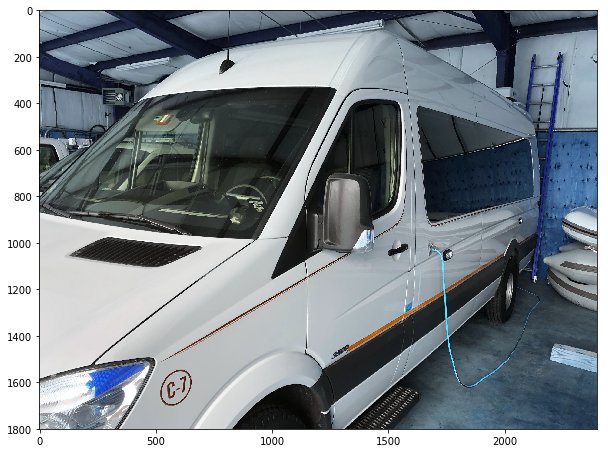

In [62]:
# colors look weird if you use imshow on the regular cv image
# this is because it's in BGR instead of RGB
plt.figure(figsize=[10,10])
plt.imshow(img)

In [0]:
# Convert to different color spaces from BGR (cv convention vs. plt convention)
RGB_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
grey_img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
HSV_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

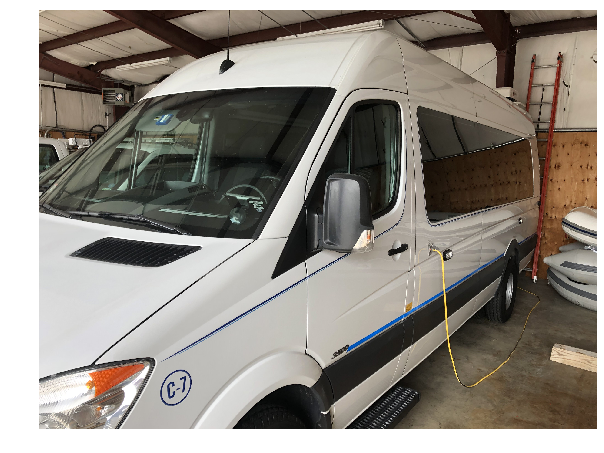

In [64]:
# correct color space
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(1,1,1)
ax.imshow(RGB_img)
ax.set_axis_off()

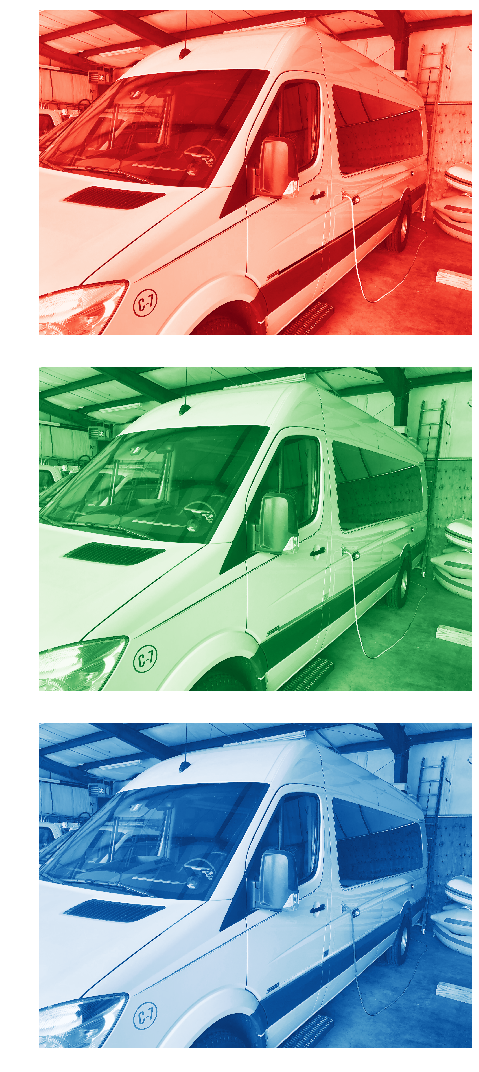

In [65]:
red_channel = RGB_img[:,:,0]
green_channel = RGB_img[:,:,1]
blue_channel = RGB_img[:,:,2]
fig = plt.figure(figsize=[10,15])
ax1 = fig.add_subplot(3,1,1)
ax1.imshow(red_channel,cmap='Reds_r')
ax1.set_axis_off()
ax2 = fig.add_subplot(3,1,2)
ax2.imshow(green_channel,cmap='Greens_r')
ax2.set_axis_off()
ax3 = fig.add_subplot(3,1,3)
ax3.imshow(blue_channel,cmap='Blues_r')
ax3.set_axis_off()
plt.tight_layout()

### Other color spaces
Much like how space can be represented both using cartesian coordinates and other coordinate systems, color spaces can be represented with other coordinates as well.

One such alternative is the hue, saturation, value (HSV) system, which can be thought of as a cylindrical coordinate system.
- Hue represents the color (low=violet, high=red)
- Saturation represents the color intensity (low=grey, high=colorful)
- Value represents brightness (low=black, high=white)

![alt text](https://upload.wikimedia.org/wikipedia/commons/3/33/HSV_color_solid_cylinder_saturation_gray.png)

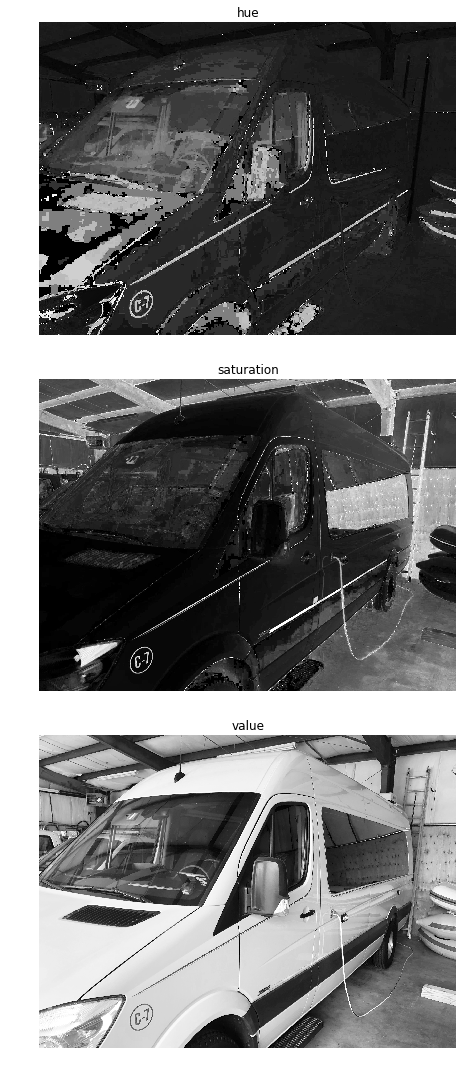

In [66]:
hue_channel = HSV_img[:,:,0]
saturation_channel = HSV_img[:,:,1]
value_channel = HSV_img[:,:,2]
fig = plt.figure(figsize=[10,15])
ax1 = fig.add_subplot(3,1,1)
ax1.imshow(hue_channel,cmap='Greys_r')
ax1.set_axis_off()
ax1.set_title('hue')
ax2 = fig.add_subplot(3,1,2)
ax2.imshow(saturation_channel,cmap='Greys_r')
ax2.set_axis_off()
ax2.set_title('saturation')
ax3 = fig.add_subplot(3,1,3)
ax3.imshow(value_channel,cmap='Greys_r')
ax3.set_axis_off()
ax3.set_title('value')
plt.tight_layout()

pyplot's imshow assumes that the first channel is red, the second is green, and the last is blue. Thus, we can present other information in the R, G, B channels. For example, we can plot the HSV channels in the RGB channels to get a trippy picture

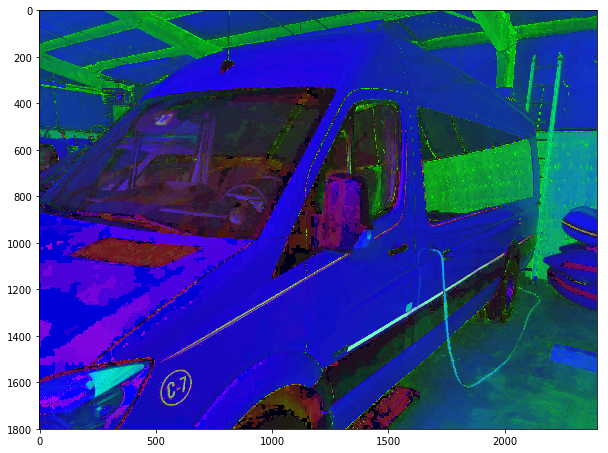

In [67]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.imshow(HSV_img)# hue -> red, saturation -> green, value -> blue

## Thresholding
Thresholding allows you to convert pixel values that are above/below a threshold to 0 or 1.

There are a ton of different [thresholding schemes](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html).

There are simple thresholding schemes:
 - cv2.THRESH_BINARY
 - cv2.THRESH_BINARY_INV
 - cv2.THRESH_TRUNC
 - cv2.THRESH_TOZERO
 - cv2.THRESH_TOZERO_INV

![thresholding_simple](https://docs.opencv.org/3.0-beta/_images/threshold.jpg)

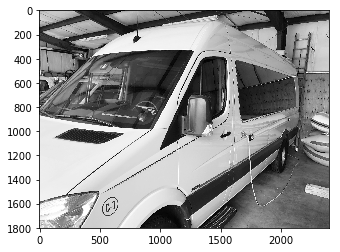

In [68]:
# original image in greyscale
plt.imshow(grey_img, cmap='Greys_r')

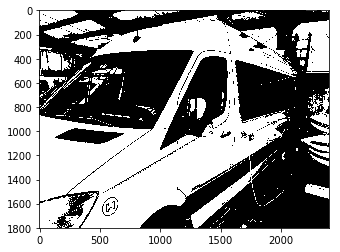

In [69]:
# let's try a simple thresholding
# values from 128-255 get converted to 255
# values below 128 get converted to zero
ret, grey_thresh = cv.threshold(grey_img, 128,255, cv.THRESH_BINARY)
plt.imshow(grey_thresh, cmap='Greys_r')

In [70]:
grey_thresh

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

### Adaptive thresholding
Simple threshold manually sets the threshold point. There are a number of adaptive methods which use the values of the other pixels to determine the threshold.

There are two available adaptive thresholds:
- cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window.

These take two additional arguments:
- neighborhood: the number of pixels to use to compute the mean or gaussian
- c: a constant that's subtracted from the window

These can be tuned to adjust performance

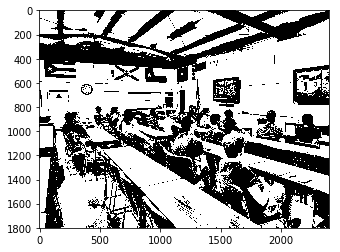

In [0]:
# using mean
grey_thresh = cv.adaptiveThreshold(grey_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, 
                                   cv.THRESH_BINARY, 301, 5)
plt.imshow(grey_thresh, cmap='Greys_r')

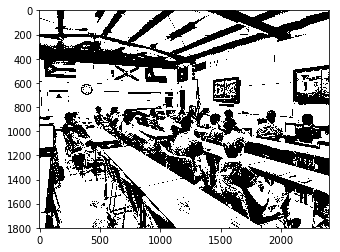

In [0]:
# using gaussian
grey_thresh = cv.adaptiveThreshold(grey_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv.THRESH_BINARY, 501, 10)
plt.imshow(grey_thresh, cmap='Greys_r')

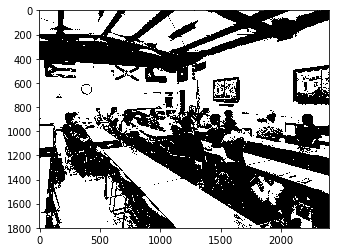

In [0]:
ret, grey_thresh = cv.threshold(grey_img, 0,255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(grey_thresh, cmap='Greys_r')

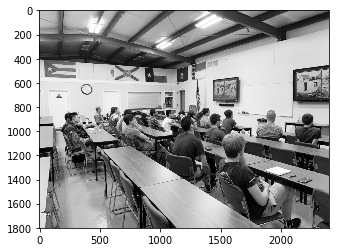

In [0]:
blurred_img = cv.GaussianBlur(grey_img,(5,5),0)
plt.imshow(blurred_img, cmap='Greys_r')

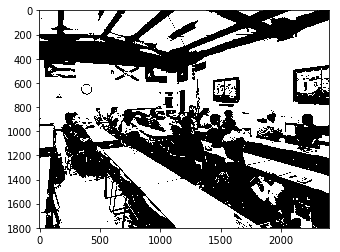

In [0]:
# this reduces some of the noise
ret, grey_thresh = cv.threshold(blurred_img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(grey_thresh, cmap='Greys_r')

## Edge detection

In [0]:
def get_edges(img):
    # Blur for lowpass
    img = cv.GaussianBlur(img,(11,11),1)
    # bilat_filt for further noise reduction w/ edge preservation
    img = cv.bilateralFilter(img,5,20,20)
    # Compute edges
    edges = cv.Canny(img,30,60)
    return edges


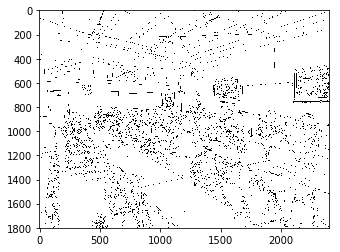

In [0]:
plt.imshow(get_edges(grey_img),cmap='Greys')

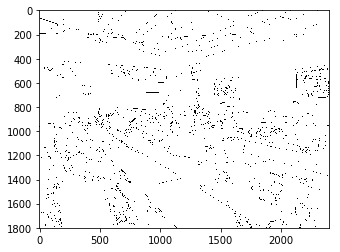

In [0]:
plt.imshow(get_edges(grey_thresh),cmap='Greys')

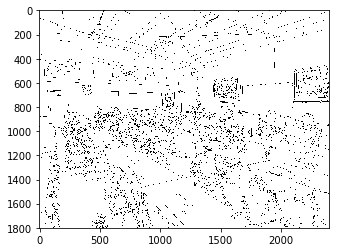

In [0]:
plt.imshow(get_edges(value_channel),cmap='Greys')